In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from umap import UMAP  # `pip install umap-learn`

PALETTE = sns.color_palette(
    [
        "#A3312A",
        "#669CC9",
    ]
)

In [6]:
hmof_data_dict = json.load(
    open("umap_data/full_hmof_ligand_properties.json", "r"),
)
polaris_data_dict = json.load(
    open("umap_data/full_polaris_ligand_properties.json"),
)

/Users/Nathaniel/miniconda3/envs/mofa/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/Nathaniel/miniconda3/envs/mofa/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


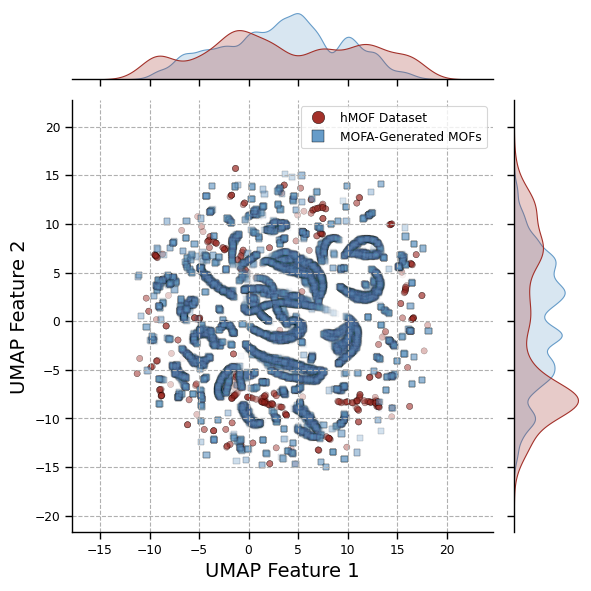

In [9]:
with sns.plotting_context("paper", font_scale=1.0):
    umap_rd = UMAP(n_components=2, random_state=1)
    umap_rd.fit(
        np.concatenate(
            [
                np.array(hmof_data_dict["hmof_rdkit_embed"]),
                np.array(polaris_data_dict["polaris_rdkit_embed"]),
            ]
        )
    )
    all_hmof_rd_umap = umap_rd.transform(np.array(hmof_data_dict["hmof_rdkit_embed"]))
    all_polaris_rd_umap = umap_rd.transform(
        np.array(polaris_data_dict["polaris_rdkit_embed"])
    )

    kind_list = ["hMOF Dataset"] * len(all_hmof_rd_umap) + [
        "MOFA-Generated MOFs"
    ] * len(all_polaris_rd_umap)
    umap_rd_df = pd.DataFrame(
        np.concatenate([all_hmof_rd_umap, all_polaris_rd_umap]),
        columns=["UMAP 1", "UMAP 2"],
    )
    umap_rd_df["Data Source"] = kind_list

    # umap_rd_df = pd.read_feather("mofa_umap.feather")
    g = sns.jointplot(
        data=umap_rd_df,
        x="UMAP 1",
        y="UMAP 2",
        hue="Data Source",
        markers=True,
        marginal_kws={"common_norm": False},
        palette=PALETTE,
        joint_kws={
            "s": 10,
            "alpha": 0.2,
        },
    )

    g.ax_joint.cla()
    sns.scatterplot(
        data=umap_rd_df,
        x="UMAP 1",
        y="UMAP 2",
        hue="Data Source",
        style="Data Source",
        markers=["o", "s"],
        s=20,
        alpha=0.05,
        palette=PALETTE,
        ax=g.ax_joint,
        edgecolor="k",
        linewidth=0.3,
    )

    plt.grid(linestyle="--")
    plt.xlabel("UMAP Feature 1", fontsize=14)
    plt.ylabel("UMAP Feature 2", fontsize=14)
    plt.tight_layout()
    leg = plt.legend(loc="best", markerscale=2)
    for lh in leg.legend_handles:
        lh.set_alpha(1)
    plt.savefig("figures/fig9.pdf", bbox_inches="tight")
    plt.show()